**LABORATORIO FINAL**

*PARTE 2*

PRESENTADO POR:

*Laura Sofía Mosquera Gruezo*

*María Celeste Isaza Vergara*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler



1. IMPLEMENTAR EL PERCEPTRON SIMPLE DEL PROBLEMA VISTO EN CLASE USANDO SKLEARN

In [2]:
X, y = datasets.make_blobs(
    n_samples=150,
    n_features=2,
    centers=2,
    cluster_std=2.05,
    random_state=2
)


In [3]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)


In [4]:
perceptron = Perceptron( warm_start=True, random_state=42)
perceptron.fit(X, y)

,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,1.0
,n_jobs,None
,random_state,42


2. REPORTE LOS PESOS W, EL BIAS Y EL LOS COSTOS

In [5]:
epochs = 300   
costos = []
pesos = []
biases = []
accuracies = []

for epoch in range(1, epochs + 1):
        perceptron.fit(X, y)
        y_pred = perceptron.predict(X)
        

        errores = np.sum(y_pred != y)
        costo = errores
        costos.append(costo)
        acc = accuracy_score(y, y_pred)
        accuracies.append(acc)

        
        # Guardar pesos y bias
        pesos.append(perceptron.coef_[0].copy())
        biases.append(perceptron.intercept_[0])

        
        print(f"Época {epoch:2d} | W: {perceptron.coef_[0]} | b: {perceptron.intercept_[0]} | Costo: {costo:.4f}")


Época  1 | W: [3.79879434 6.40805316] | b: 48.0 | Costo: 11.0000
Época  2 | W: [ 5.84769782 13.50644771] | b: 53.0 | Costo: 3.0000
Época  3 | W: [4.39233614 7.0615348 ] | b: 57.0 | Costo: 14.0000
Época  4 | W: [ 3.97990007 11.16982624] | b: 61.0 | Costo: 3.0000
Época  5 | W: [ 7.11308009 15.77643704] | b: 65.0 | Costo: 2.0000
Época  6 | W: [ 5.54576771 15.99237313] | b: 66.0 | Costo: 2.0000
Época  7 | W: [ 5.11313315 16.79273689] | b: 67.0 | Costo: 4.0000
Época  8 | W: [ 6.16278931 11.29552683] | b: 71.0 | Costo: 6.0000
Época  9 | W: [ 2.74441789 16.98571373] | b: 73.0 | Costo: 3.0000
Época 10 | W: [-1.70499698 15.43389224] | b: 75.0 | Costo: 6.0000
Época 11 | W: [ 6.45283449 16.36107031] | b: 77.0 | Costo: 1.0000
Época 12 | W: [ 5.08635813 18.17658746] | b: 78.0 | Costo: 2.0000
Época 13 | W: [ 6.63124267 16.25738161] | b: 78.0 | Costo: 1.0000
Época 14 | W: [ 7.69608155 14.83302477] | b: 80.0 | Costo: 4.0000
Época 15 | W: [ 7.21586405 13.27951561] | b: 81.0 | Costo: 5.0000
Época 16 | W

3. GRAFIQUE LOS COSTOS VS LAS EPOCHS 

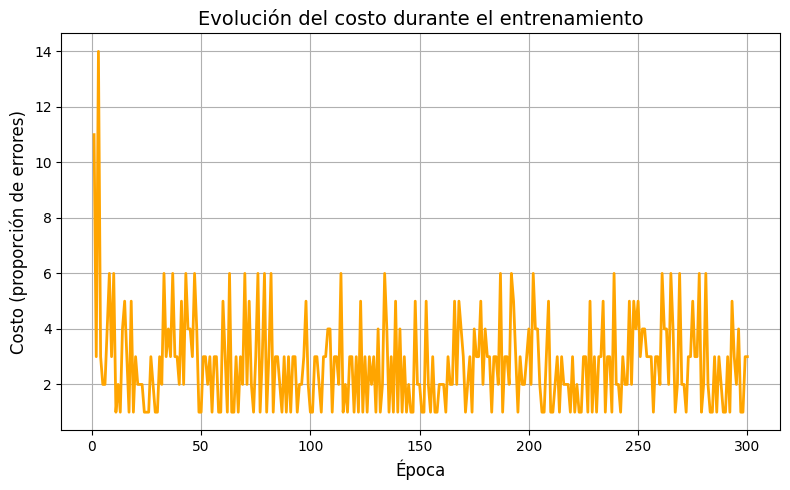

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), costos, color='orange', linewidth=2)
plt.title("Evolución del costo durante el entrenamiento", fontsize=14)
plt.xlabel("Época", fontsize=12)
plt.ylabel("Costo (proporción de errores)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


4. GRAFIQUE EL ACCURACY VS LAS EPOCHS

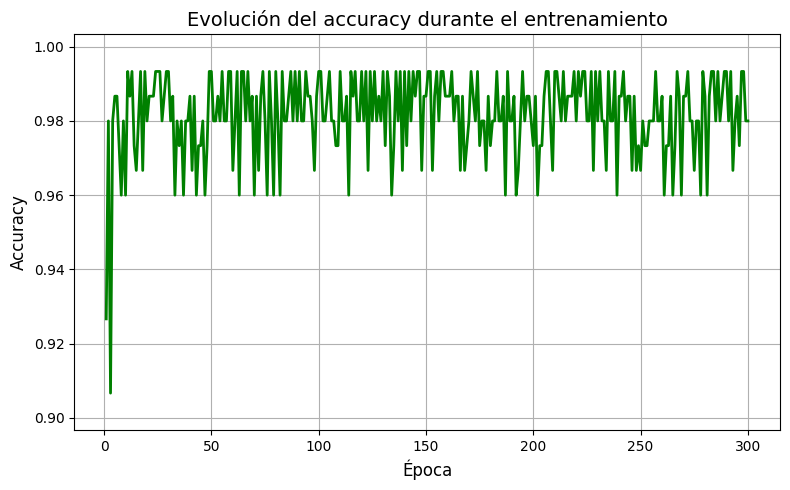

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), accuracies, color='green', linewidth=2)
plt.title("Evolución del accuracy durante el entrenamiento", fontsize=14)
plt.xlabel("Época", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(min(accuracies) - 0.01, max(accuracies) + 0.01)  # escala dinámica
plt.grid(True)
plt.tight_layout()
plt.show()

6. PRESENTE LAS METRICAS DE CLASIFICACION CON SU RESPECTIVA INTERPRETACION (ACCURACY, F1-SCORE, MATRIZ DE CONFUSION, SENSIBILIDAD Y ESPECIFICIDAD).

In [8]:
# Calcular métricas
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
cm = confusion_matrix(y, y_pred)

tn, fp, fn, tp = cm.ravel()
sensibilidad = tp / (tp + fn)
especificidad = tn / (tn + fp)

# Mostrar resultados
print("MÉTRICAS DE CLASIFICACIÓN")
print(f"Accuracy      : {accuracy:.4f}")
print(f"F1-Score      : {f1:.4f}")
print(f"Sensibilidad  : {sensibilidad:.4f}")
print(f"Especificidad : {especificidad:.4f}")
print("\nMatriz de Confusión:")
print(cm)

MÉTRICAS DE CLASIFICACIÓN
Accuracy      : 0.9800
F1-Score      : 0.9799
Sensibilidad  : 0.9733
Especificidad : 0.9867

Matriz de Confusión:
[[74  1]
 [ 2 73]]


7. SIMULE UNA MUESTRA NUEVA (COMO SI FUESE UN PACIENTE NUEVO) Y HAGA LA CLASIFICACION DE ES PACIENTE CON EL ALGORITMO ENTRENADO

In [9]:
paciente_nuevo = np.array([[2.5, -6.3]])   

# Clasificación con el modelo entrenado
prediccion = perceptron.predict(paciente_nuevo)

print("Paciente:", paciente_nuevo)
print("Clase:", prediccion[0])


Paciente: [[ 2.5 -6.3]]
Clase: 0
